# Random Graphs

In the same way that we can generate random numbers from a given
distribution, like the normal or the binomial distribution,
we can sample not numbers but random graphs
from a collection or ensemble of random graphs.
Just like different distributions of numbers
give rise to different samples of numbers,
different random graph models give rise to different kinds of random graphs.
The simplest possible random graph model is the so-called `Erdos-Renyi`, also known as the ER graph model.
This family of random graphs has two parameters, capital `N` and lowercase `p`.
Here the capital N is the `number of nodes` in the graph,
and p is the `probability for any pair of nodes to be connected by an edge.`

If the value of p is very small, typical graphs generated from the model
tend to be sparse, meaning having few edges.
In contrast, if the value of p is large, typical graphs
tend to be densely connected.

Although Networkx has an implementation of this, we'll be writing our own ER function to better understand the model.

Our task is to implement an ER model as a Python function.
Let's first see how to implement the coin flip just one time

To do this, we'll be using the SciPy stats module, more specifically
a function called Bernoulli.
We'll first import that from SciPy stats import Bernoulli.
And then we can call this function.
We'll be using the rvs method to generate one single realization
in this case of a Bernoulli random variable.
The only input argument is p, which is the probability of success.
In this case, the outcomes are coded as 0s and 1s.
That means that p is the probability that we get an outcome 1 as opposed
to outcome 0.

In [16]:
import networkx as nx

In [28]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

In [2]:
bernoulli.rvs(p=0.2)

1

In [3]:
bernoulli.rvs(p=0.2)

0

In [4]:
bernoulli.rvs(p=0.2)

0

In [5]:
bernoulli.rvs(p=0.2)

1

In [6]:
bernoulli.rvs(p=0.2)

0

In [7]:
bernoulli.rvs(p=0.2)

0

In [8]:
bernoulli.rvs(p=0.2)

0

In [9]:
bernoulli.rvs(p=0.2)

0

In [10]:
bernoulli.rvs(p=0.2)

0

In [11]:
bernoulli.rvs(p=0.2)

0

Lets write a pseudocode

In [14]:

#create empty graph
#add n nodes inthe graph
    #loop over all pairs of nodes and add an edge with probability p

In [17]:
N=20
p=.2

#create empty graph
#add n nodes inthe graph
    #loop over all pairs of nodes and add an edge with probability p
    
G=nx.Graph()
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes():
        #we add an edge with probability p
        if bernoulli.rvs(p=p):
            G.add_edge(node1,node2)

In [19]:
G.number_of_nodes()

20

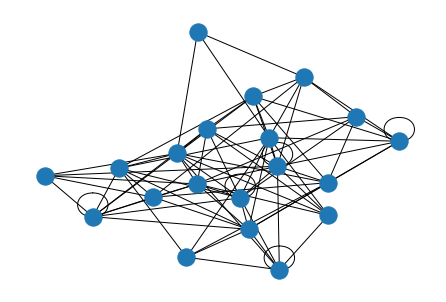

In [20]:
nx.draw(G)

problem is that is comparing each node pair twice But because our graph is undirected, we should consider
each pair of nodes just one time.

For this reason, we need to impose an extra constraint such as node
1 less than node 2 or node 1 greater than node 2.
Either additional constraint will force us to consider
each pair of nodes just one time.

In [23]:
N=20
p=.2

#create empty graph
#add n nodes inthe graph
    #loop over all pairs of nodes and add an edge with probability p
    
G=nx.Graph()
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes():
        #we add an edge with probability p
        if node1<node2 and bernoulli.rvs(p=p):
            G.add_edge(node1,node2)

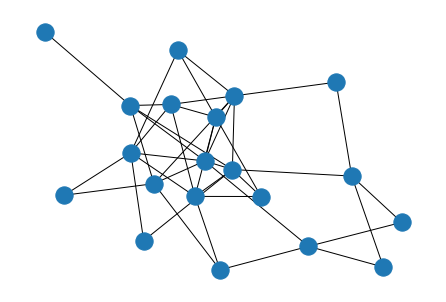

In [24]:
nx.draw(G)

In [25]:
def er_graph(N,p):
    """Generate and ER graph"""
    G=nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            #we add an edge with probability p
            if node1<node2 and bernoulli.rvs(p=p):
                G.add_edge(node1,node2)
    return G

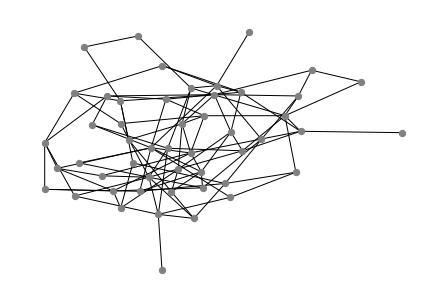

In [29]:
nx.draw(er_graph(50,0.08),node_size=40,node_color="gray")
plt.savefig("er1.pdf")

and this is our own homemade Erdos-Renyi graph.

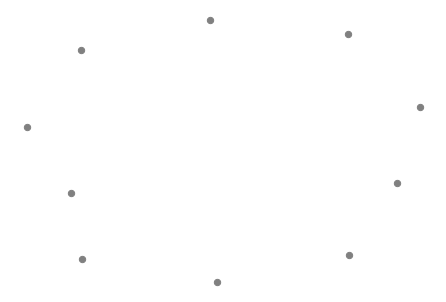

In [31]:
nx.draw(er_graph(10 ,0), node_size = 40, node_color = 'gray')
plt.savefig('test_comp_er1.pdf')
plt.show()